# Test 16: F-test for two population variances (variance ratio test)

## Objective

- To investigate the significance of the difference between two population variances

## Assumptions

- The two populations should both follow normal distributions
    - Note that they only need to be normal, don't need to following the same distribution!! 

## Method

- Imagine there are 2 populations $X$ and $Y$ that each follow a normal distribution (not necessarily the same distribution)
- We take a sample $x$ of size $n_1$ from $X$, and a sample $y$ of size $n_2$ from $Y$. This gives us:
$$\begin{aligned}
    \bar{x} &= \frac{\sum (x_i)}{n_1}, \qquad \bar{y} = \frac{\sum (y_i)}{n_2} \\ 
    s_x^2 &= \frac{\sum (x_i - \bar{x})^2}{n_1 - 1}, \qquad s_y^2 = \frac{\sum (y_i - \bar{y})^2}{n_2 - 1} \\ 
\end{aligned}$$

- Then under the null hypothesis, the test statistic is 
$$
    F = \frac{s_x^2}{s_y^2}
$$

- The test statistic follows an $F$ distribution with $(n_1-1, n_2-1)$ degrees of freedom

## Example

- Problem
    - Two production lines for the manufacture of springs are compared. 
    - The variances of the compression resistance (in standard units) for the two production lines should be the same. 
    - Two samples are taken, one from each production line and variances are calculated. 
    
- Question    
    - What can be said about the two population variances from which the two samples have been taken? Is it likely that they differ? 
    
The variance ratio statistic F
is calculated as the ratio of the two variances and yields a value of 0.36/0.087 = 4.14.
The 5 per cent critical value for F is 5.41. We do not reject our null hypothesis of
no difference between the two population variances. There is no significant difference
between population variances.

In [20]:
import numpy as np
import scipy

n1 = 4
n2 = 6
sum_x = 0.4
sum_xsq = 0.3
sd_x = 0.087
sum_y = 0.06
sum_ysq = 1.78
sd_y = 0.36

test_statistic = (0.087/0.36)**2
critical_value_upper = scipy.stats.f.ppf(q=0.975, dfn = n1-1, dfd = n2-1)
critical_value_lower = scipy.stats.f.ppf(q=0.025, dfn = n1-1, dfd = n2-1)
# ?scipy.stats.f.cdf

## Proof by simulation that test statistic follows F distribution

In [62]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

POPULATION_X = np.random.normal(5,2,10_000)
POPULATION_Y = np.random.normal(5,2,10_000)
SAMPLE_SIZE_X=100
SAMPLE_SIZE_Y=200

def get_test_statistic():
    x = np.random.choice(POPULATION_X, SAMPLE_SIZE_X)
    y = np.random.choice(POPULATION_Y, SAMPLE_SIZE_Y)

    sx_sq = np.sum((x - np.mean(x))**2)/(SAMPLE_SIZE_X-1)
    sy_sq = np.sum((y - np.mean(y))**2)/(SAMPLE_SIZE_Y-1)

    test_statistic = sx_sq/sy_sq
    return test_statistic

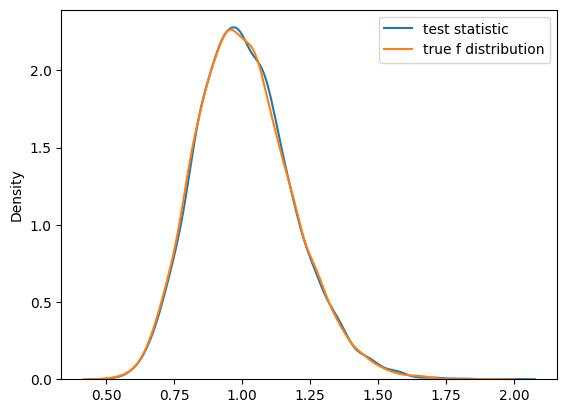

In [64]:
test_statistic_distribution = np.array([get_test_statistic() for _ in range(10_000)])
true_f_distribution = np.random.f(SAMPLE_SIZE_X-1, SAMPLE_SIZE_Y-1, 10_000)
sns.kdeplot(test_statistic_distribution, label='test statistic')
sns.kdeplot(true_f_distribution, label='true f distribution')
plt.legend()